# Iowa Liquor Sales Tax Project - Scenario 1

## Data Intake

In [1]:
#Adjust the file path as appropriate
import pandas as pd

## Load the data into a DataFrame
df = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')
df.head()

## Transform the dates to the appropriate format
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

In [2]:
#View a sample of the data
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [4]:
#Rename the columns to fit standard convention. Used lowercase and underscore
col = {'Date':'date', 'Store Number':'store_number', 'City':'city', 'Zip Code':'zip_code', 'County Number':'county_number','Category':'category', 'Category Name':'category_name',
          'Vendor Name':'vendor_name', 'Item Number':'item_number', 'Item Description':'item_description', 'Bottle Volume (ml)':'bottle_volume', 'State Bottle Cost':'state_bottle_cost',
          'State Bottle Retail':'state_retail', 'Bottles Sold':'bottles_sold', 'Sale (Dollars)': 'sale_dollars', 'Volume Sold (Liters)':'volume_sold_liters',
          'Volume Sold (Gallons)':'volume_sold_gallons'}
df.rename(columns = col, inplace = True)

In [5]:
#Convert cost and sale columns to float
to_float = lambda x: float(x[1:])

df.state_bottle_cost = df.state_bottle_cost.apply(to_float)
df.state_retail = df.state_retail.apply(to_float)
df.sale_dollars = df.sale_dollars.apply(to_float)


In [6]:
#Ensure that all columns are in the correct format
df.dtypes

date                   datetime64[ns]
store_number                    int64
city                           object
zip_code                       object
county_number                 float64
County                         object
category                      float64
category_name                  object
Vendor Number                   int64
item_number                     int64
item_description               object
bottle_volume                   int64
state_bottle_cost             float64
state_retail                  float64
bottles_sold                    int64
sale_dollars                  float64
volume_sold_liters            float64
volume_sold_gallons           float64
dtype: object

# Data Cleaning

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.shape

(270955, 18)

In [9]:
df.isnull().sum()

date                      0
store_number              0
city                      0
zip_code                  0
county_number          1077
County                 1077
category                 68
category_name           632
Vendor Number             0
item_number               0
item_description          0
bottle_volume             0
state_bottle_cost         0
state_retail              0
bottles_sold              0
sale_dollars              0
volume_sold_liters        0
volume_sold_gallons       0
dtype: int64

In [10]:
#The nulls are categorical data. There is no obvious fill for them and the number of rows are small compared to the total
df.dropna(inplace = True) 

In [11]:
df.isnull().sum()

date                   0
store_number           0
city                   0
zip_code               0
county_number          0
County                 0
category               0
category_name          0
Vendor Number          0
item_number            0
item_description       0
bottle_volume          0
state_bottle_cost      0
state_retail           0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
volume_sold_gallons    0
dtype: int64

# Data Exploration

In [12]:
print 'Store count', df.store_number.value_counts().shape
print 'Category count', df.category.value_counts().shape
print 'City count', df.city.value_counts().shape
print 'County count', df['County'].value_counts().shape
print 'Vendor count', df['Vendor Number'].value_counts().shape
print 'Item count', df.item_number.value_counts().shape

#There are many unique values in these categorical variables. 

Store count (1378L,)
Category count (72L,)
City count (382L,)
County count (99L,)
Vendor count (115L,)
Item count (2677L,)


In [13]:
df.describe()

,store_number,county_number,category,Vendor Number,item_number,bottle_volume,state_bottle_cost,state_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,269258.000000,269258.000000,2.692580e+05,269258.00000,269258.000000,269258.000000,269258.000000,269258.000000,269258.000000,269258.000000,269258.000000,269258.000000
mean,3587.695311,57.229642,1.043866e+06,256.36045,45944.813164,925.217375,9.763293,14.660848,9.874028,128.828546,8.991069,2.375397
std,946.505088,27.338810,5.021834e+04,140.98313,52557.185155,492.837459,7.039787,10.559164,24.072335,383.477046,28.963204,7.651262
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,5.500000,8.250000,2.000000,30.420000,1.500000,0.400000
50%,3721.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,8.000000,12.110000,6.000000,70.560000,5.250000,1.390000
75%,4376.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000


In [14]:
import seaborn as sns
import matplotlib
import scipy.stats as stats
%matplotlib inline

NormaltestResult(statistic=46800.305083157538, pvalue=0.0)


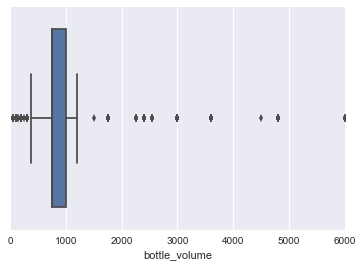

In [15]:
#Plot and perform normal tests to understand skew
sns.boxplot(df.bottle_volume)
print stats.normaltest(df.bottle_volume)

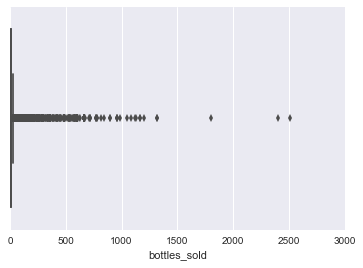

NormaltestResult(statistic=659474.13060179283, pvalue=0.0)


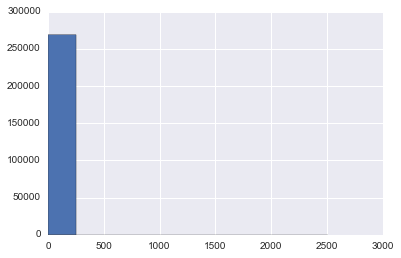

In [16]:
sns.boxplot(df.bottles_sold)
plt.show()
plt.hist(df.bottles_sold)
print stats.normaltest(df.bottles_sold)

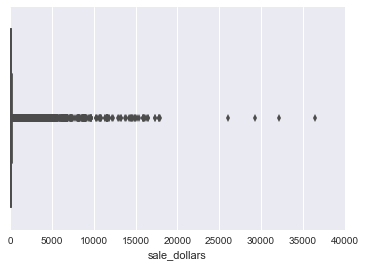

NormaltestResult(statistic=658489.41494200623, pvalue=0.0)


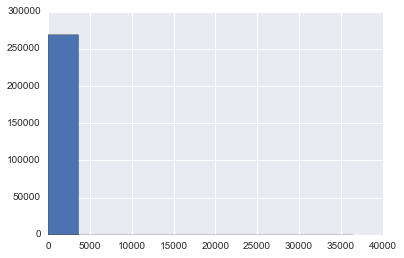

In [17]:
sns.boxplot(df.sale_dollars)
plt.show()
plt.hist(df.sale_dollars)
print stats.normaltest(df.sale_dollars)

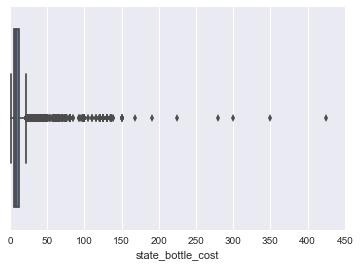

NormaltestResult(statistic=321741.66030413087, pvalue=0.0)


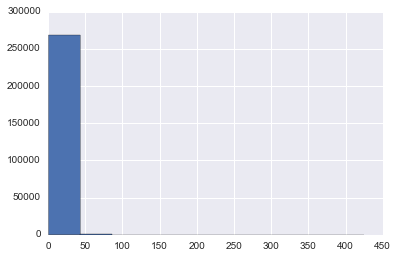

In [18]:
sns.boxplot(df.state_bottle_cost)
plt.show()
plt.hist(df.state_bottle_cost)
print stats.normaltest(df.state_bottle_cost)

NormaltestResult(statistic=321694.89263354917, pvalue=0.0)


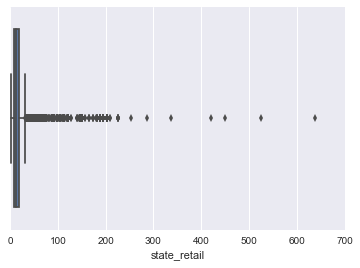

In [19]:
sns.boxplot(df.state_retail)
print stats.normaltest(df.state_retail)

NormaltestResult(statistic=670144.35194108635, pvalue=0.0)


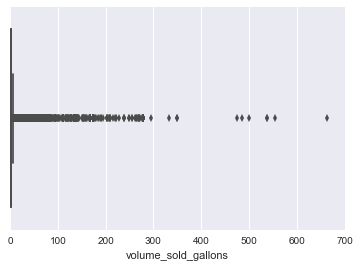

In [20]:
sns.boxplot(df.volume_sold_gallons)
print stats.normaltest(df.volume_sold_gallons)

There are many outliers in sales, volumes, and costs. None of the distributions are normal as seen in the very low p values.

# Summary Tables by Store for 2015 and 2016

In [21]:
#Determine the date range. The data does not have data from January 1 to January 4 2015
print df.date.min() 
print df.date.max()

2015-01-05 00:00:00
2016-03-31 00:00:00


In [22]:
df['year'] = df.date.map(lambda x: x.year)
df['month'] = df.date.map(lambda x: x.month)

def quarter(x):
    if x <4:
        return 1
    elif x <7:
        return 2
    elif x < 10:
        return 3
    else: return 4
df['quarter'] = df.month.map(quarter)

In [23]:
#Determine yearly sales by store
yearly_sales = df.groupby(['year','store_number']).sale_dollars.sum().reset_index()

In [24]:
#Rename the columns
yearly_sales.rename(columns ={'sale_dollars':'yearly sales by store'},inplace=True)

In [25]:
#Determine first quarter 2015 sales
first_quarter2015_sales = df[(df['year'] == 2015) & (df['quarter'] ==1)].groupby(['year','store_number', 'quarter']).sale_dollars.sum().reset_index()

In [26]:
#Rename the columns
first_quarter2015_sales.rename(columns ={'sale_dollars':'first_quarter2015_sales_by_store'},inplace=True)

In [27]:
#Create dataframe with yearly sales and first quarter sales by store
total_2015 = pd.merge(first_quarter2015_sales, yearly_sales, on = ['year','store_number'], how = 'left')

In [28]:
#Repeat process for different metrics to create 2015 summary table
bottle_vol = df.groupby(['year','store_number']).bottle_volume.sum().reset_index()
bottle_vol.rename(columns ={'bottle_volume':'bottle_volume_by_year'},inplace=True)

bottle_sold = df.groupby(['year','store_number']).bottles_sold.sum().reset_index()
bottle_sold.rename(columns ={'bottles_sold':'bottles_sold_by_year'},inplace=True)

state_bottle_cost = df.groupby(['year','store_number']).state_bottle_cost.sum().reset_index()
state_bottle_cost.rename(columns ={'state_bottle_cost':'state_bottle_cost_by_year'},inplace=True)

state_retail = df.groupby(['year','store_number']).state_retail.sum().reset_index()
state_retail.rename(columns ={'state_retail':'state_retail_by_year'},inplace=True)

volume_sold_gallons = df.groupby(['year','store_number']).volume_sold_gallons.sum().reset_index()
volume_sold_gallons.rename(columns ={'volume_sold_gallons':'volume_sold_gallons_by_year'},inplace=True)

volume_sold_liters = df.groupby(['year','store_number']).volume_sold_liters.sum().reset_index()
volume_sold_liters.rename(columns ={'volume_sold_liters':'volume_sold_liters_by_year'},inplace=True)

total_2015 = pd.merge(total_2015, bottle_vol, on = ['year','store_number'], how = 'left')
total_2015 = pd.merge(total_2015, bottle_sold, on = ['year','store_number'], how = 'left')
total_2015 = pd.merge(total_2015, state_bottle_cost, on = ['year','store_number'], how = 'left')
total_2015 = pd.merge(total_2015, state_retail, on = ['year','store_number'], how = 'left')
total_2015 = pd.merge(total_2015, volume_sold_gallons, on = ['year','store_number'], how = 'left')
total_2015 = pd.merge(total_2015, volume_sold_liters, on = ['year','store_number'], how = 'left')


In [30]:
#Summary table for 2016
first_quarter2016_sales = df[(df['year'] == 2016) & (df['quarter'] ==1)].groupby(['year','store_number', 'quarter']).sale_dollars.sum().reset_index()
first_quarter2016_sales.rename(columns ={'sale_dollars':'first_quarter2016_sales_by_store'},inplace=True)
total_2016 = pd.merge(first_quarter2016_sales, yearly_sales, on = ['year','store_number'], how = 'left')
bottle_vol = df.groupby(['year','store_number']).bottle_volume.sum().reset_index()
bottle_vol.rename(columns ={'bottle_volume':'bottle_volume_by_year'},inplace=True)

bottle_sold = df.groupby(['year','store_number']).bottles_sold.sum().reset_index()
bottle_sold.rename(columns ={'bottles_sold':'bottles_sold_by_year'},inplace=True)

state_bottle_cost = df.groupby(['year','store_number']).state_bottle_cost.sum().reset_index()
state_bottle_cost.rename(columns ={'state_bottle_cost':'state_bottle_cost_by_year'},inplace=True)

state_retail = df.groupby(['year','store_number']).state_retail.sum().reset_index()
state_retail.rename(columns ={'state_retail':'state_retail_by_year'},inplace=True)

volume_sold_gallons = df.groupby(['year','store_number']).volume_sold_gallons.sum().reset_index()
volume_sold_gallons.rename(columns ={'volume_sold_gallons':'volume_sold_gallons_by_year'},inplace=True)

volume_sold_liters = df.groupby(['year','store_number']).volume_sold_liters.sum().reset_index()
volume_sold_liters.rename(columns ={'volume_sold_liters':'volume_sold_liters_by_year'},inplace=True)

total_2016 = pd.merge(first_quarter2016_sales, yearly_sales, on = ['year','store_number'], how = 'left')

total_2016 = pd.merge(total_2016, bottle_vol, on = ['year','store_number'], how = 'left')
total_2016 = pd.merge(total_2016, bottle_sold, on = ['year','store_number'], how = 'left')
total_2016 = pd.merge(total_2016, state_bottle_cost, on = ['year','store_number'], how = 'left')
total_2016 = pd.merge(total_2016, state_retail, on = ['year','store_number'], how = 'left')
total_2016 = pd.merge(total_2016, volume_sold_gallons, on = ['year','store_number'], how = 'left')
total_2016 = pd.merge(total_2016, volume_sold_liters, on = ['year','store_number'], how = 'left')

In [31]:
total_2015.head()

,year,store_number,quarter,first_quarter2015_sales_by_store,yearly sales by store,bottle_volume_by_year,bottles_sold_by_year,state_bottle_cost_by_year,state_retail_by_year,volume_sold_gallons_by_year,volume_sold_liters_by_year
0,2015,2106,1,39287.29,146038.70,477600,10355,5417.16,8131.82,2568.16,9719.85
1,2015,2113,1,2833.25,9310.22,139125,671,1597.97,2398.40,174.29,659.85
2,2015,2130,1,24272.57,111583.91,363550,7418,3840.70,5763.64,1817.48,6879.37
3,2015,2152,1,2003.46,7721.08,149500,573,1207.67,1817.16,167.28,633.37
4,2015,2178,1,5856.41,24324.18,241700,1928,2296.49,3450.41,506.50,1917.12


In [32]:
total_2016.head()

,year,store_number,quarter,first_quarter2016_sales_by_store,yearly sales by store,bottle_volume_by_year,bottles_sold_by_year,state_bottle_cost_by_year,state_retail_by_year,volume_sold_gallons_by_year,volume_sold_liters_by_year
0,2016,2106,1,30478.75,30478.75,118000,2218,1305.79,1960.55,559.12,2116.25
1,2016,2113,1,2065.90,2065.90,36500,159,396.25,594.86,46.74,177.00
2,2016,2130,1,27856.11,27856.11,111825,1726,1242.55,1864.08,411.33,1556.90
3,2016,2152,1,904.66,904.66,20375,97,165.13,248.34,23.11,87.50
4,2016,2178,1,5588.50,5588.50,61175,480,537.45,807.09,137.59,520.80


# Data Correlations

In [33]:
total_2015.corr()

,year,store_number,quarter,first_quarter2015_sales_by_store,yearly sales by store,bottle_volume_by_year,bottles_sold_by_year,state_bottle_cost_by_year,state_retail_by_year,volume_sold_gallons_by_year,volume_sold_liters_by_year
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_number,NaN,1.000000,NaN,-0.343348,-0.348360,-0.595265,-0.368331,-0.550851,-0.550963,-0.386319,-0.386335
quarter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_quarter2015_sales_by_store,NaN,-0.343348,NaN,1.000000,0.981436,0.716328,0.968045,0.752130,0.752033,0.972713,0.972707
yearly sales by store,NaN,-0.348360,NaN,0.981436,1.000000,0.738171,0.986929,0.772349,0.772260,0.992400,0.992395
bottle_volume_by_year,NaN,-0.595265,NaN,0.716328,0.738171,1.000000,0.765385,0.986530,0.986578,0.755450,0.755438
bottles_sold_by_year,NaN,-0.368331,NaN,0.968045,0.986929,0.765385,1.000000,0.794830,0.794749,0.984342,0.984329
state_bottle_cost_by_year,NaN,-0.550851,NaN,0.752130,0.772349,0.986530,0.794830,1.000000,1.000000,0.775458,0.775438
state_retail_by_year,NaN,-0.550963,NaN,0.752033,0.772260,0.986578,0.794749,1.000000,1.000000,0.775399,0.775379
volume_sold_gallons_by_year,NaN,-0.386319,NaN,0.972713,0.992400,0.755450,0.984342,0.775458,0.775399,1.000000,1.000000


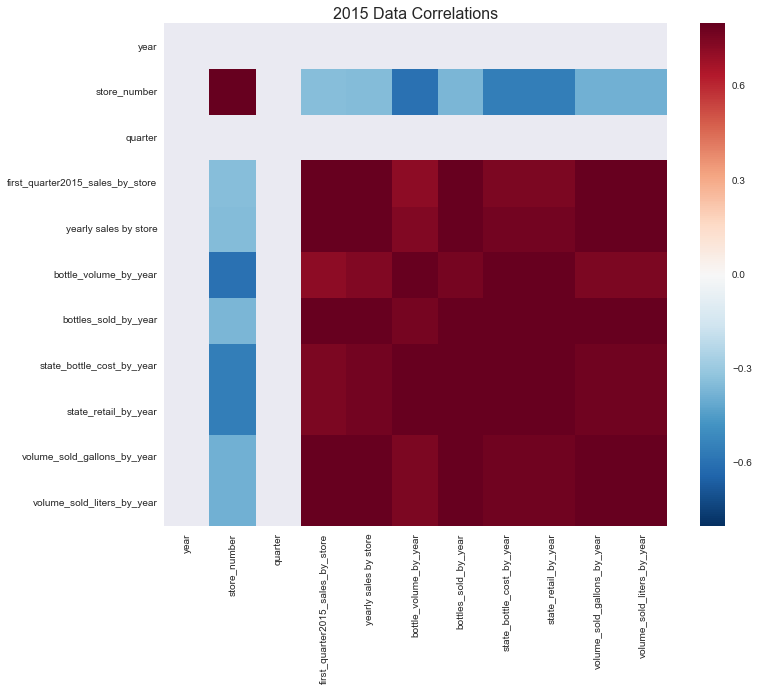

In [34]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(total_2015.corr(), vmax=.8, square=True)
ax.set_title('2015 Data Correlations', fontsize=16)

In [35]:
total_2016.corr()

,year,store_number,quarter,first_quarter2016_sales_by_store,yearly sales by store,bottle_volume_by_year,bottles_sold_by_year,state_bottle_cost_by_year,state_retail_by_year,volume_sold_gallons_by_year,volume_sold_liters_by_year
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
store_number,NaN,1.000000,NaN,-0.333205,-0.333205,-0.564926,-0.345646,-0.526165,-0.526198,-0.356086,-0.356091
quarter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_quarter2016_sales_by_store,NaN,-0.333205,NaN,1.000000,1.000000,0.736897,0.983509,0.768774,0.768773,0.990173,0.990167
yearly sales by store,NaN,-0.333205,NaN,1.000000,1.000000,0.736897,0.983509,0.768774,0.768773,0.990173,0.990167
bottle_volume_by_year,NaN,-0.564926,NaN,0.736897,0.736897,1.000000,0.763409,0.983280,0.983311,0.747826,0.747806
bottles_sold_by_year,NaN,-0.345646,NaN,0.983509,0.983509,0.763409,1.000000,0.789559,0.789560,0.982477,0.982462
state_bottle_cost_by_year,NaN,-0.526165,NaN,0.768774,0.768774,0.983280,0.789559,1.000000,1.000000,0.763849,0.763817
state_retail_by_year,NaN,-0.526198,NaN,0.768773,0.768773,0.983311,0.789560,1.000000,1.000000,0.763863,0.763831
volume_sold_gallons_by_year,NaN,-0.356086,NaN,0.990173,0.990173,0.747826,0.982477,0.763849,0.763863,1.000000,1.000000


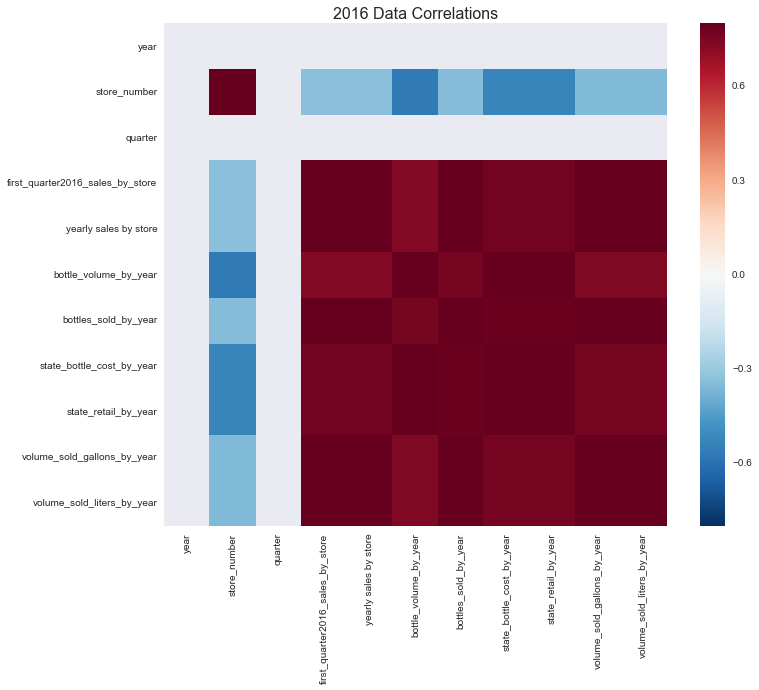

In [36]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(total_2016.corr(), vmax=.8, square=True)
ax.set_title('2016 Data Correlations', fontsize=16)

All numeric columns except store_number, quarter and year are highly correlated. 

# Linear Regression Models evaluated with Root Mean Square Error

Because of the high correlation between numeric columns, all of them except first_quarter2015_sales_by_store will be removed 
for the fit

In [37]:
#Run a linear regression and determine the root mean squared error as well as the coefficients
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.cross_validation import train_test_split

features = ['first_quarter2015_sales_by_store', 'bottle_volume_by_year']
X_train, X_test, y_train, y_test = train_test_split(total_2015[features], total_2015["yearly sales by store"],  random_state=0)

lm = linear_model.LinearRegression(normalize=True)

model = lm.fit(X_train, y_train)
predictions_2015 = lm.predict(X_test)
print "RMSE:", (mean_squared_error(y_test, predictions_2015))**0.5  #Add square root
print 'Coefficients:', model.coef_

RMSE: 8517.75055216
Coefficients: [ 4.3270878   0.01502355]


In [38]:
#Use the regression to predict sales
predictions_2016 = lm.predict(total_2016[['first_quarter2016_sales_by_store', 'bottle_volume_by_year']])
print 'Total 2016 predicted sales:', sum(predictions_2016)

Total 2016 predicted sales: 26118839.577


In [39]:
print '2015 total sales:', sum(total_2015['yearly sales by store'])

2015 total sales: 27816516.03


In [40]:
print 'Sales will decrease in 2016 by ', sum(total_2015['yearly sales by store'])-sum(predictions_2016)

Sales will decrease in 2016 by  1697676.45303


In [41]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 5-fold cross validation
scores = cross_val_score(model, total_2015[features], total_2015["yearly sales by store"], cv=5)
print "Cross-validated scores:", scores
# Make cross validated predictions
preds = cross_val_predict(model, total_2015[features], total_2015["yearly sales by store"], cv=5)
print "RMSE:", (mean_squared_error(total_2015["yearly sales by store"], preds))**0.5
print 'Coefficients:', model.coef_

Cross-validated scores: [ 0.95517248  0.93377478  0.79584163  0.65786308  0.98912134]
RMSE: 10143.7069637
Coefficients: [ 4.3270878   0.01502355]


In [42]:
total_2015["yearly sales by store"].mean()

22059.092807295816

## Plot

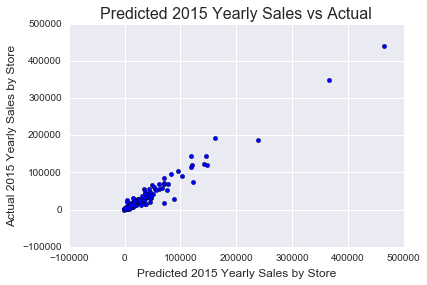

In [43]:
#Plot predicted vs actual sales
plt.scatter(predictions_2015, y_test)
ax = plt.gca()
ax.set_title('Predicted 2015 Yearly Sales vs Actual', fontsize=16)
ax.set_ylabel('Actual 2015 Yearly Sales by Store', fontsize=12)
ax.set_xlabel('Predicted 2015 Yearly Sales by Store', fontsize=12)

The predicted and actual values for 2015 yearly sales match fairly closely. The Q1 2015 sales are highly correlated with
the total 2015 sales as they are, of course, a part of the total. However, putting so much emphasis on one variable may make the 
model susceptible to error due to bias.

# Regularization

In [44]:
lm = linear_model.RidgeCV(alphas=[1])
model = lm.fit(X_train, y_train)
ridge_predictions_2015 = lm.predict(X_test)
print "RMSE:", (mean_squared_error(ridge_predictions_2015, y_test))**0.5
print 'Coefficients:', model.coef_

RMSE: 8552.7690532
Coefficients: [ 4.32723572  0.01650551]


In [45]:
lm = linear_model.LassoCV(alphas=[1])
model = lm.fit(X_train, y_train)
lasso_predictions_2015 = lm.predict(X_test)
print "RMSE:", (mean_squared_error(lasso_predictions_2015, y_test))**0.5
print 'Coefficients:', model.coef_

RMSE: 8517.75057907
Coefficients: [ 4.32708781  0.01502355]


The regularized Ridge model performs worse than the regular model. The Ridge model is being flattened out too much. 

# Conclusion and Next Steps

In order to predict yearly sales by store, most useful variable available is Q1 sales by store. Most other variables are too highly correlated to be used with Q1 sales. Modeling with Q1 sales and bottle volume by year (which has a coefficient that is 2 orders of magnitude smaller) produces a root mean square error (RMSE) of 8517. 

Compared to the median 2015 yearly sales value of 7771, this RMSE seems high. However, compared to the mean 2015 yaerly sales value of 22059, the RMSE is better. Thus, outliers in the data are heavily skewing the model and causing higher than expected RMSE. Regularizaing the data via Lasso and Ridge do not change RMSE significantly and using cross-validation increases RMSE.

The model predicts a drop of $1.6M from 2015 to 2016 total sales. This is approxiamtely a 6% drop in sales and tax revenue. Considering the high RMSE, expected tax revenue for a constant tax rate may range from 0 to a 12% drop. 

For further analysis:
- Learn about causes for outlier data. Perhaps an unaccounted for variable may be found.
- Model with catgorical variables.
- Study how demand varies with to tax rate. 
- Model against the full data set, although we can be confident of the 10% sample is fairly representative.